Final point for f1 from (0.1, 0.1): (0.010737418240000003, 0.010737418240000003)
Final point for f1 from (-1, 1): (-0.13261955589475316, 0.13261955589475316)
Final point for f2 from (0, 1): (0.0, 1.9999990997123154)
Final point for f2 from (0, -1): (0.0, -1.9999997749292553)


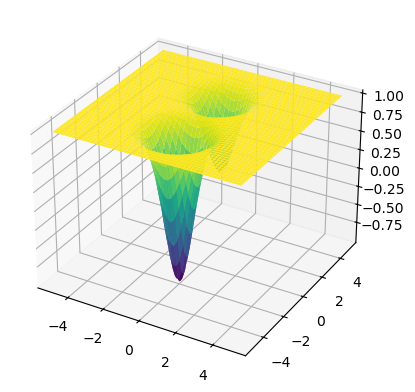

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_descent(x0, y0, f, grad_f, alpha, num_iterations):
    """
    Parameters:
    x0, y0: Initial point for the descent.
    f: a function of two variables
    grad_f: the gradient of f
    alpha: Learning rate.
    num_iterations: Number of iterations to perform.
    
    Returns:
    (x, y): The coordinates of the final point after gradient descent.
    """
    x, y = x0, y0  # Initialize x and y with the initial point
    for i in range(num_iterations):
        grad_x, grad_y = grad_f(x, y)  # Compute the gradient
        x -= alpha * grad_x  # Update x in the opposite direction of gradient
        y -= alpha * grad_y  # Update y in the opposite direction of gradient
    return x, y

# Function f1 and its gradient
def fun_1(x, y):
    return x**2 + y**2

def grad_f_1(x, y):
    grad_x = 2 * x #derivative with respect to x
    grad_y = 2 * y #derivative with respect to y
    return grad_x, grad_y

# Apply gradient descent on f1
test_cases_1 = [(0.1, 0.1, 0.1, 10),(-1, 1, 0.01, 100)]

for x0, y0, alpha, num_iterations in test_cases_1:
    result = gradient_descent(x0, y0, fun_1, grad_f_1, alpha, num_iterations)
    print(f"Final point for f1 from ({x0}, {y0}): {result}")

# Function f2 and its gradient
def fun_2(x, y):
    return 1 - np.exp(-x**2 - (y-2)**2) - 2*np.exp(-x**2 - (y+2)**2)

def grad_f_2(x, y):
    grad_x = 2 * x * (np.exp(-x**2 - (y-2)**2) + 2 * np.exp(-x**2 - (y+2)**2))
    grad_y = 2 * (y-2) * np.exp(-x**2 - (y-2)**2) + 4 * (y+2) * np.exp(-x**2 - (y+2)**2)
    return grad_x, grad_y

# Apply gradient descent on f2
test_cases_2 = [
    (0, 1, 0.01, 10000),
    (0, -1, 0.01, 10000)
]
for x0, y0, alpha, num_iterations in test_cases_2:
    result = gradient_descent(x0, y0, fun_2, grad_f_2, alpha, num_iterations)
    print(f"Final point for f2 from ({x0}, {y0}): {result}")

# Plot f2
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(X, Y)
z = fun_2(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
plt.show()
